<h1 style="font-family:Impact,Arial;font-size:30px;">Currency option market quotes</h1>

Currency options are often quoted in the market in terms of implied volatilities, for at–the–money (ATM), and for 25% and 10% "delta" risk reversals (RR) and butterflies (BF). The quoted ATM volatility is the Black/Scholes implied volatility of an option with strike equal to the forward exchange rate. The "implied volatility" of an $x\%$ delta risk reversal is given by the difference between the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money call and the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money put. The "implied volatility" of an $x\%$ delta butterfly is given by the average of the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money call and the Black/Scholes implied volatility of an $x\%$ delta out–of–the–money put, minus the ATM volatility. Consider the following data for currency options maturing in one month’s time (implied volatilities in percentage points):

<table>
    <tr><th>ATM </th><th> 25D RR </th><th> 25D BF </th><th> 10D RR </th><th> 10D BF </th></tr>
    <tr><th>9.5750 </th><th> -0.4500 </th><th>0.2750 </th><th>-0.7500 </th><th>1.1250 </th></tr>
</table>

The spot exchange rate is 1.47565 units of domestic currency per unit of foreign currency, the domestic interest rate $r$ is 3.285% continuously compounded and the foreign interest rate $r_f$ is 4.179% continuously compounded.

<B>Task:</B> Determine the Black/Scholes implied volatilities of the out–of–the–money call and put options. Plot the implied volatility smile.

In order to calculate the respective call and put implied volatilities at the different delta levels we must rearrange the equations for the risk reversal and butterfly strategies to allow us to solve a system of equations. The system of equations used to solve for the call and put implied volatilities is given by:

Matrix 1:
$$-0.45 = \sigma_{25\Delta,C}  - \sigma_{25\Delta,P}$$
$$19.7 = \sigma_{25\Delta,C}  + \sigma_{25\Delta,P}$$


Matrix 2:
$$-0.75 = \sigma_{10\Delta,C}  - \sigma_{10\Delta,P}$$
$$21.4 = \sigma_{10\Delta,C}  + \sigma_{10\Delta,P}$$

[ 9.625 10.075]
[10.325 11.075]


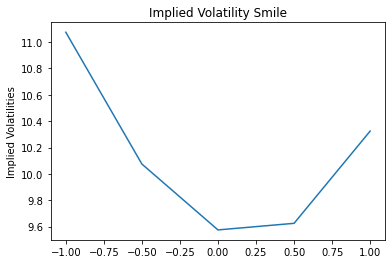

In [5]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1,-1],[1,1]])
B = np.array([-0.45,19.7])
x = np.linalg.solve(A,B)
print(x)

call_25D_sgm = x[0]
put_25D_sgm = x[1]

C = np.array([[1,-1], [1,1]])
D = np.array([-0.75,21.4])
y = np.linalg.solve(C,D)
print(y)

call_10D_sgm = y[0]
put_10D_sgm = y[1]

atm = 9.5750

y = [put_10D_sgm, put_25D_sgm, atm, call_25D_sgm, call_10D_sgm]
x = np.linspace(-1,1,5)

plt.plot(x,y)
plt.ylabel("Implied Volatilities")
plt.title("Implied Volatility Smile")
plt.show()

In the market quotes above, the delta determines the strikes of the out–of–the–money options, which are such that the absolute value of the option delta equals the prescribed level. For the options considered here, we have for the strike $K_{\omega,\Delta}$:
$$ K_{\omega,\Delta} = F(0,T)\exp\left\{-\omega N^{-1}(\omega e^{r_fT}\Delta)\sigma_{\omega,\Delta}\sqrt{T}+\frac12\sigma^2_{\omega,\Delta}T\right\} $$
where $F(0,T)$ is the forward exchange rate for the option maturity $T$, $\omega = 1$ for a call and $\omega = -1$ for a put, $\Delta$ is the option delta (where put option delta is negative), and $\sigma_{\omega,\Delta}$ is the Black/Scholes implied volatility of the (call or put) option with delta $\Delta$. $N^{-1}$ is the inverse of the standard normal cumulative distribution function - this is available as `norm.ppf()` in the `scipy.stats` package.

**Task:** Calculate the five option strikes for the European options determining the quotes in the above table. Determine the prices of European call options at these five strikes consistent with the above quotes (you may assume that put/call parity holds, i.e. the Black/Scholes implied volatilities of call and put options at a fixed strike are the same).

In [2]:
from scipy.stats import norm

r_f = 0.04179
r_d = 0.03285
spot = 1.47565
dt = 1/12
f_t = spot*np.exp((r_d - r_f)*dt)
print(f_t)

implied_sgm = [put_10D_sgm, put_25D_sgm, atm, call_25D_sgm, call_10D_sgm]

def strike(forward_rate,callput,foreign_rate,sgm,T,delta):
    return forward_rate*np.exp((-callput*norm.ppf(callput*np.exp(foreign_rate*T)*delta)*(sgm/100)*np.sqrt(T)) + (0.5*(sgm/100)**2*T))

put_10D_strike = strike(f_t,-1,r_f,put_10D_sgm,dt,-0.10)
put_25D_strike = strike(f_t,-1,r_f,put_25D_sgm,dt,-0.25)
atm_strike = strike(f_t,1,r_f,atm,dt,0.5)
call_10D_strike = strike(f_t,1,r_f,call_10D_sgm,dt,0.10)
call_25D_strike = strike(f_t,1,r_f,call_25D_sgm,dt,0.25)

print(f"The strike for the 10% Delta out of the money put is: {put_10D_strike}")
print(f"The strike for the 25% Delta out of the money put is: {put_25D_strike}")
print(f"The strike for the ATM option is: {atm_strike}")
print(f"The strike for the 10% Delta out of the money call is: {call_10D_strike}")
print(f"The strike for the 25% Delta out of the money call is: {call_25D_strike}")

1.4745510501596442
The strike for the 10% Delta out of the money put is: 1.4161698164742649
The strike for the 25% Delta out of the money put is: 1.4466338652393922
The strike for the ATM option is: 1.4749361790303146
The strike for the 10% Delta out of the money call is: 1.5325547886489035
The strike for the 25% Delta out of the money call is: 1.5029112684680703


Assuming the implied volatilities between call and puts are the same at a fixed strike, we can use the call option pricing formula at each strike and its respective implied volatility to calculate the 5 option prices. The pricing formula is given by:

$$C = S_0e^{-r_fT}\mathcal{N}(d1) - Ke^{r_dT}\mathcal{N}(d2)$$

$$d1 = \frac{ln(S_0/K) + (r_d - r_f + \sigma^2/2)T}{\sigma\sqrt{T}}$$

$$d2 = d1 - \sigma\sqrt{T}$$


In [4]:
r_f = 0.04179
r_d = 0.03285
spot = 1.47565
dt = 1/12

def foreign_exchange_call(S,K,sgm,r_domestic,r_foreign,T):
    d1 = (np.log(S/K) + (r_domestic - r_foreign + 0.5*(sgm/100)**2) * T) / ((sgm/100) * np.sqrt(T))
    d2 = d1 - (sgm/100)*np.sqrt(T)

    price = S*np.exp(-r_foreign*T)*norm.cdf(d1) - K*np.exp(-r_domestic*T)*norm.cdf(d2)
    return price

call_1 = foreign_exchange_call(spot,put_10D_strike,put_10D_sgm,r_d,r_f,dt)
call_2 = foreign_exchange_call(spot, put_25D_strike,put_25D_sgm,r_d,r_f,dt)
call_3 = foreign_exchange_call(spot,atm_strike,atm,r_d,r_f,dt)
call_4 = foreign_exchange_call(spot,call_25D_strike,call_25D_sgm,r_d,r_f,dt)
call_5 = foreign_exchange_call(spot,call_10D_strike,call_10D_sgm,r_d,r_f,dt)

print(f"The price of the first call option is: {call_1}")
print(f"The price of the second call option is: {call_2}")
print(f"The price of the ATM option is: {call_3}")
print(f"The price of the fourth call option is: {call_4}")
print(f"The price of the fifth call option is: {call_5}")

The price of the first call option is: 0.06048681708666526
The price of the second call option is: 0.03434399208792693
The price of the ATM option is: 0.01602574276939106
The price of the fourth call option is: 0.0060380187641478344
The price of the fifth call option is: 0.0020582374833789385


<h1 style="font-family:Impact,Arial;font-size:30px;">Option pricing in the presence of jumps</h1>

Consider the option pricing formula in the Black/Scholes model augmented by jumps, as derived in Lecture 10 (see equation (70) of that lecture). Note that the relevant inputs defining the stochastic dynamics of the underlying asset under the risk-neutral measure are the initial asset price $S$, the volatility of the diffusion component $\sigma$, the continuously compounded interest rate $r$, the intensity $\lambda$ of the Poisson process triggering the jumps (see slide 6 of the lecture), the expected proportional change $k$ in the asset price when a jump occurs (defined in equation (24) of the lecture), and the standard deviation of the logarithmic proportional jumps $\delta$ (as defined by equation (28) of the lecture).

**Task**

Using the scaffold provided, implement a Python function `JumpBlackScholes(S,K,sgm,r,T,callput,k,lam,delta,eps)`, returning the price of a European option in the Black/Scholes model augmented by jumps, with arguments of `S =` $S$, `sgm =` $\sigma$, `r =` $r$, `k =` $k$, `lam =` $\lambda$, `delta =` $\delta$, as well as the strike `K` and maturity `T` of the option, where `callput` is $1$ for a call and $-1$ for a put, and the infinite sum in equation (70) of the lecture is truncated once further terms in the summation decrease below the threshold given by `eps`.

Note that the factorial appearing in equation (70) can be evaluated using the function `factorial` imported from the `math` package.

**Example**

`Enter the underlying stock price: 100
Enter the strike price: 110
Enter the volatility: 0.2
Enter continuously compounded interest rate: 0.05
Enter the time to maturity: 0.5 
Enter 1 for call or -1 for put option: 1 
Enter the expected proportional change in the asset price when a jump occurs: 0.1 
Enter the intensity of the jump process: 1.0 
Enter the standard deviation of the logarithmic proportional jumps: 0.05 
Enter the threshold at which to truncate the infinite sum: 1e-7 
The option price is 3.6994861009744047`

In [25]:
# your code here
from scipy.stats import norm
import numpy as np
import math

def JumpBlackScholes(S, K, sgm, r, T, callput, k, lam, delta, eps):

    n = 0
    summation = 1
    value = 0

    gam = np.log(1+k)
    lam_prime = lam*(1+k)

    def standard_call(S,K,sgm,r,T):
        d1 = (np.log(S/K) + (r+0.5*sgm**2) * T) / (sgm * np.sqrt(T))
        d2 = d1 - sgm*np.sqrt(T)
        price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
        return price

    def standard_put(S,K,sgm,r,T):
        d1 = (np.log(S/K) + (r+0.5*sgm**2) * T) / (sgm * np.sqrt(T))
        d2 = d1 - sgm*np.sqrt(T)
        price = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
        return price

    while summation >= eps:

        r_n = r - lam*k + (n*gam)/T
        v = np.sqrt(sgm**2 + (n*delta**2)/T)
        poisson = (np.exp(-lam_prime*T)*(lam_prime*T)**n)/(math.factorial(n))

        if callput == 1:
            summation = poisson*standard_call(S,K,v,r_n,T)

        elif callput == -1:
            summation = poisson*standard_put(S,K,v,r_n,T)

        value += summation
        n += 1

    return value

stock = float(input('Enter the underlying stock price: '))
strike = float(input('Enter the strike price: '))
sigma = float(input('Enter the volatility: '))
interest = float(input('Enter continuously compounded interest rate: '))
maturity = float(input('Enter the time to maturity: '))
callput = int(input('Enter 1 for call or -1 for put option: '))
k = float(input('Enter the expected proportional change in the asset price when a jump occurs: '))
lam = float(input('Enter the intensity of the jump process: '))
delta = float(input('Enter the standard deviation of the logarithmic proportional jumps: '))
eps = float(input('Enter the threshold at which to truncate the infinite sum: '))
result = JumpBlackScholes(stock,strike,sigma,interest,maturity,callput,k,lam,delta,eps)
print('The option price is '+str(result))

The option price is 3.6994861009744047


**Task:** Consider a Black/Scholes model augmented by jumps with parameters as in the example above. If market prices of call and put options were given by such a model, what would be the (standard Black/Scholes) implied volatilities for at–the–money (ATM), and for 25% and 10% delta risk reversals and butterflies? What are the strikes of the out-of-the-money options making up the risk reversals and butterflies? Plot the implied volatility smile given by the market in this case.

In [93]:
# Set up 3 equations using the functions defined earlier in order to solve for three unknown values: Strike, Implied Vol, Price

from scipy.optimize import fsolve

def f_1(x,y,z,S,r,T,callput):
    d1 = (np.log(S/y)+(r+0.5*x**2)*(T))/(x*np.sqrt(T))
    d2 = d1 - x*np.sqrt(T)

    if callput == 1:
        return S*norm.cdf(d1)-y*np.exp(-r*(T))*norm.cdf(d2)-z
    else:
        return y*np.exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)-z

def f_2(x,y,forward_rate,callput,T,delta,r):
    return forward_rate*np.exp((-callput*norm.ppf(callput*np.exp(r*T)*delta)*(x)*np.sqrt(T)) + (0.5*(x)**2*T)) - y

def f_3(y,z,S, sgm, r, T, callput, k, lam, delta, eps):

    n = 0
    summation = 1
    value = 0

    gam = np.log(1+k)
    lam_prime = lam*(1+k)

    def standard_call(S,y,sgm,r,T):
        d1 = (np.log(S/y) + (r+0.5*sgm**2) * T) / (sgm * np.sqrt(T))
        d2 = d1 - sgm*np.sqrt(T)
        price = S*norm.cdf(d1) - y*np.exp(-r*T)*norm.cdf(d2)
        return price

    def standard_put(S,y,sgm,r,T):
        d1 = (np.log(S/y) + (r+0.5*sgm**2) * T) / (sgm * np.sqrt(T))
        d2 = d1 - sgm*np.sqrt(T)
        price = y*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
        return price

    while summation >= eps:

        r_n = r - lam*k + (n*gam)/T
        v = np.sqrt(sgm**2 + (n*delta**2)/T)
        poisson = (np.exp(-lam_prime*T)*(lam_prime*T)**n)/(math.factorial(n))

        if callput == 1:
            summation = poisson*standard_call(S,y,v,r_n,T)

        elif callput == -1:
            summation = poisson*standard_put(S,y,v,r_n,T)

        value += summation
        n += 1

    return value - z


In [94]:
def hgj(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]

    h = f_1(x,y,z,100,0.05,0.5,-1)
    g = f_2(x,y,f_t,-1,0.5,-0.1,0.05)
    j = f_3(y,z,100,0.2,0.05,0.5,-1,0.1,1.0,0.05,1e-7)
    return np.array([h,g,j])

guess = np.array([0.3,95,1.0])

put_10D_impliedvol = fsolve(hgj,guess)[0]
put_10D_impliedstrike = fsolve(hgj,guess)[1]
put_10D_impliedprice = fsolve(hgj,guess)[2]

print(put_10D_impliedvol)
print(put_10D_impliedstrike)
print(put_10D_impliedprice)

0.22020935284293422
85.19702669685662
0.8121267500871314


In [95]:
def hgj(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]

    h = f_1(x,y,z,100,0.05,0.5,-1)
    g = f_2(x,y,f_t,-1,0.5,-0.25,0.05)
    j = f_3(y,z,100,0.2,0.05,0.5,-1,0.1,1.0,0.05,1e-7)
    return np.array([h,g,j])

guess = np.array([0.3,95,1.0])

put_25D_impliedvol = fsolve(hgj,guess)[0]
put_25D_impliedstrike = fsolve(hgj,guess)[1]
put_25D_impliedprice = fsolve(hgj,guess)[2]

print(put_25D_impliedvol)
print(put_25D_impliedstrike)
print(put_25D_impliedprice)

0.22334166413874856
93.62012003130152
2.642895512064259


In [97]:
def hgj(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]

    h = f_1(x,y,z,100,0.05,0.5,1)
    g = f_2(x,y,f_t,1,0.5,0.5,0.05)
    j = f_3(y,z,100,0.2,0.05,0.5,1,0.1,1.0,0.05,1e-7)
    return np.array([h,g,j])

guess = np.array([0.3,95,1.0])

atm_impliedvol = fsolve(hgj,guess)[0]
atm_impliedstrike = fsolve(hgj,guess)[1]
atm_impliedprice = fsolve(hgj,guess)[2]

print(atm_impliedvol)
print(atm_impliedstrike)
print(atm_impliedprice)

0.22735128844102748
103.33652229011207
6.046737360496618


In [98]:
def hgj(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]

    h = f_1(x,y,z,100,0.05,0.5,1)
    g = f_2(x,y,f_t,1,0.5,0.25,0.05)
    j = f_3(y,z,100,0.2,0.05,0.5,1,0.1,1.0,0.05,1e-7)
    return np.array([h,g,j])

guess = np.array([0.3,105,1.5])

call_25D_impliedvol = fsolve(hgj,guess)[0]
call_25D_impliedstrike = fsolve(hgj,guess)[1]
call_25D_impliedprice = fsolve(hgj,guess)[2]

print(call_25D_impliedvol)
print(call_25D_impliedstrike)
print(call_25D_impliedprice)

0.23295014028722083
115.76706143843349
2.342990439894555


In [99]:
def hgj(xyz):
    x = xyz[0]
    y = xyz[1]
    z = xyz[2]

    h = f_1(x,y,z,100,0.05,0.5,1)
    g = f_2(x,y,f_t,1,0.5,0.1,0.05)
    j = f_3(y,z,100,0.2,0.05,0.5,1,0.1,1.0,0.05,1e-7)
    return np.array([h,g,j])

guess = np.array([0.3,105,1.8])

call_10D_impliedvol = fsolve(hgj,guess)[0]
call_10D_impliedstrike = fsolve(hgj,guess)[1]
call_10D_impliedprice = fsolve(hgj,guess)[2]

print(call_10D_impliedvol)
print(call_10D_impliedstrike)
print(call_10D_impliedprice)

0.23911312368162527
128.86045403238037
0.7702659641326292


In [113]:
def risk_reversal_vol(call_vol, put_vol):
    return call_vol - put_vol

def butterfly_vol(put_vol, call_vol, atm_vol):
    return np.mean([put_vol,call_vol]) - atm_vol

rr_10D = risk_reversal_vol(put_10D_impliedvol, call_10D_impliedvol)
rr_25D = risk_reversal_vol(put_25D_impliedvol, call_25D_impliedvol)
butterfly_10D = butterfly_vol(put_10D_impliedvol,call_10D_impliedvol,atm_impliedvol)
butterfly_25D = butterfly_vol(put_25D_impliedvol,call_25D_impliedvol,atm_impliedvol)

print(f"Implied vol of a 10% Delta OTM Risk Reversal: {rr_10D*100}")
print(f"Implied vol of a 25% Delta OTM Risk Reversal: {rr_25D*100}")
print(f"ATM Volatility: {atm_impliedvol}")
print(f"Implied vol of a 10% Delta OTM Butterfly: {butterfly_10D*100}")
print(f"Implied vol of  25% Delta OTM Butterfly: {butterfly_25D*100} ")

Implied vol of a 10% Delta OTM Risk Reversal: -1.8903770838691047
Implied vol of a 25% Delta OTM Risk Reversal: -0.9608476148472267
ATM Volatility: 0.22735128844102748
Implied vol of a 10% Delta OTM Butterfly: 0.23099498212522662
Implied vol of  25% Delta OTM Butterfly: 0.079461377195722 


Implied Volatility: 22.02%
Strike Price 85.20

Implied Volatility: 22.33%
Strike Price 93.62

Implied Volatility: 22.74%
Strike Price 103.34

Implied Volatility: 23.30%
Strike Price 115.77

Implied Volatility: 23.91%
Strike Price 128.86



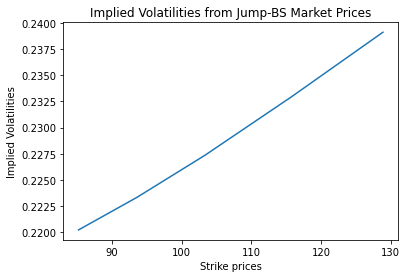

In [117]:
vols = [put_10D_impliedvol, put_25D_impliedvol, atm_impliedvol, call_25D_impliedvol, call_10D_impliedvol]
strikes = [put_10D_impliedstrike, put_25D_impliedstrike, atm_impliedstrike, call_25D_impliedstrike, call_10D_impliedstrike]

plt.plot(strikes, vols)
plt.title("Implied Volatilities from Jump-BS Market Prices")
plt.xlabel("Strike prices")
plt.ylabel("Implied Volatilities")
plt.plot()

for i in range(len(vols)):
    print(f"Implied Volatility: {vols[i]*100:.2f}%")
    print(f"Strike Price {strikes[i]:.2f}\n")